In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
%matplotlib inline

In [2]:
data = pd.read_csv('predictions.csv')

/usr/local/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,11,12,13,16,17,18,19,20,21,22,23,24,29,30,31,34,35,37) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
data.head(5)

,Unnamed: 0,Unnamed: 0.1,coordinates,created_at,hashtags,media,urls,favorite_count,id,in_reply_to_screen_name,...,user_location,user_name,user_screen_name.1,user_statuses_count,user_time_zone,user_urls,user_verified,Sentiment,tokens,sentiment_probs
0,0,12,NaN,Fri Mar 20 02:30:14 +0000 2020,NaN,NaN,NaN,1,1240827963609841665,NaN,...,"Asheville, NC",Ken Trips,KenTrips,7245.0,NaN,http://soundcloud.com/ken-trips,False,0.0,anybody know anyone that has tested positive f...,0.445350
1,1,15,NaN,Fri Mar 20 02:15:11 +0000 2020,NaN,NaN,NaN,0,1240824173661839360,NaN,...,somewhere in a place,S.skelly,undedhead,4565.0,NaN,NaN,False,0.0,smh i want a time machine so i can skip all th...,0.045267
2,2,39,NaN,Thu Mar 19 21:17:08 +0000 2020,NaN,NaN,NaN,1,1240749170325164032,NaeYaCampRules,...,From Eden,Nae!,NaeYaCampRules,98067.0,NaN,http://shopgeneralpublic.com,False,0.0,lady other day said she hope i get corona viru...,0.086959
3,3,47,NaN,Fri Mar 20 02:22:01 +0000 2020,NaN,NaN,NaN,19,1240825895969054720,NaN,...,NaN,‏ً,_jebbb,35075.0,NaN,http://instagram.com/_kini,False,0.0,"i dnt have corona i promise , i just have asthma",0.172202
4,4,67,NaN,Fri Mar 20 03:30:29 +0000 2020,NaN,NaN,NaN,3,1240843123774889984,NaN,...,"Toronto, Ontario",i hate it here.,prettyhans3,6571.0,NaN,NaN,False,0.0,is depression a symptom of corona ?,0.130952


In [5]:
data.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'coordinates', 'created_at', 'hashtags',
       'media', 'urls', 'favorite_count', 'id', 'in_reply_to_screen_name',
       'in_reply_to_status_id', 'in_reply_to_user_id', 'lang', 'place',
       'possibly_sensitive', 'retweet_count', 'reweet_id',
       'retweet_screen_name', 'source', 'text', 'tweet_url', 'user_created_at',
       'user_screen_name', 'user_default_profile_image', 'user_description',
       'user_favourites_count', 'user_followers_count', 'user_friends_count',
       'user_listed_count', 'user_location', 'user_name', 'user_screen_name.1',
       'user_statuses_count', 'user_time_zone', 'user_urls', 'user_verified',
       'Sentiment', 'tokens', 'sentiment_probs'],
      dtype='object')

In [6]:
data.describe()

,Unnamed: 0,in_reply_to_status_id,possibly_sensitive,retweet_count,user_favourites_count,user_followers_count,user_friends_count,user_listed_count,user_statuses_count,user_time_zone,Sentiment,sentiment_probs
count,838136.000000,3.746600e+04,5.000000,770721.000000,7.070640e+05,7.070640e+05,7.070640e+05,707064.000000,7.070640e+05,0.0,838136.000000,838136.000000
mean,419067.500000,1.245244e+18,13998.600000,2.587742,1.419301e+04,3.807743e+03,1.015124e+03,17.270594,2.156575e+04,NaN,0.490585,0.521104
std,241949.166946,2.613207e+16,12029.527684,165.242123,3.024201e+04,9.101625e+04,1.137565e+04,156.134257,4.921060e+04,NaN,0.499912,0.374593
min,0.000000,0.000000e+00,196.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,1.000000e+00,NaN,0.000000,0.000099
25%,209533.750000,1.243286e+18,3592.000000,0.000000,5.280000e+02,7.000000e+01,1.230000e+02,0.000000,7.970000e+02,NaN,0.000000,0.139715
50%,419067.500000,1.246587e+18,16345.000000,0.000000,3.780000e+03,3.190000e+02,3.310000e+02,1.000000,5.229000e+03,NaN,0.000000,0.476039
75%,628601.250000,1.249042e+18,20715.000000,0.000000,1.454700e+04,1.040000e+03,7.750000e+02,6.000000,2.115900e+04,NaN,1.000000,0.950677
max,838135.000000,1.251367e+18,29145.000000,107556.000000,1.243064e+06,1.822643e+07,4.403586e+06,39232.000000,4.172521e+06,NaN,1.000000,0.999998


In [30]:
def convert_to_date(string):
    try:
        month = string[4:7]
        day = string[8:10]
        year = '2020'
        return month + '-' + day + '-' + year
    except:
        return None
    
data['date'] = pd.to_datetime(data['created_at'].apply(convert_to_date))

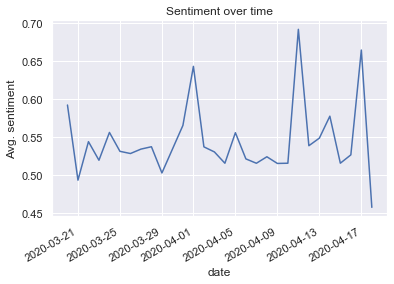

In [59]:
start_date = '2020-03-19'
end_date = '2020-04-18'
valid_dates = data[(data['date'] > start_date) & (data['date'] <= end_date)]
valid_dates.groupby('date')['sentiment_probs'].mean().plot()
plt.title('Sentiment over time')
plt.ylabel('Avg. sentiment')
plt.savefig('images/sentiment_over_time.png')

In [78]:
import geopandas as gpd
from shapely.geometry import Point

In [171]:
country = gpd.read_file("viz/gz_2010_us_040_00_5m.json")
country.head(2)

,GEO_ID,STATE,NAME,LSAD,CENSUSAREA,geometry
0,0400000US01,01,Alabama,,50645.326,"(POLYGON ((-88.124658 30.28364, -88.0868119999..."
1,0400000US02,02,Alaska,,570640.950,"(POLYGON ((-166.10574 53.988606, -166.075283 5..."


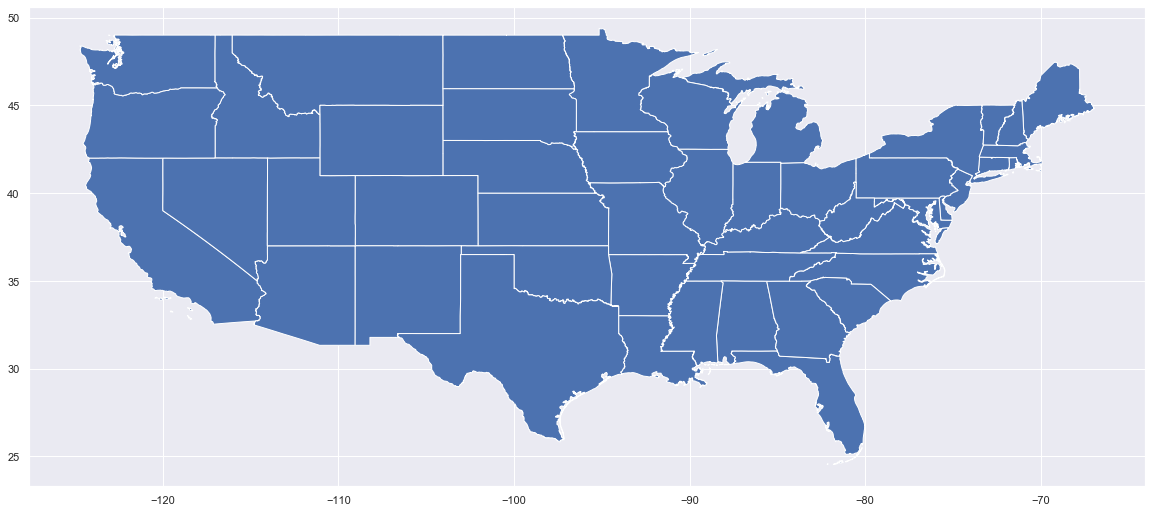

In [172]:
country[country['NAME'].isin(['Alaska','Hawaii', 'Puerto Rico']) == False].plot(figsize=(20,20))

In [92]:
states = {
    'Alabama': ['AL', 'Alabama', 'alabama'],
    'Alaska': ['AK', 'Alaska', 'alaska'],
    'Arizona': ['AZ', 'Arizona', 'arizona'],
    'Arkansas': ['AR', 'Arkansas', 'arkansas'],
    'California': ['CA', 'California', 'california'],
    'Colorado': ['CO', 'Colorado', 'colorado'],
    'Connecticut': ['CT', 'Connecticut', 'connecticut'],
    'Delaware': ['DE', 'Delaware', 'delaware'],
    'Florida': ['FL', 'Florida', 'florida'],
    'Georgia': ['GA', 'Georgia', 'georgia'],
    'Hawaii': ['HI', 'Hawaii', 'hawaii'],
    'Idaho': ['ID', 'Idaho', 'idaho'],
    'Illinois': ['IL', 'Illinois', 'illinois'],
    'Indiana': ['IN', 'Indiana', 'indiana'],
    'Iowa': ['IA', 'Iowa', 'iowa'],
    'Kansas': ['KS', 'Kansas', 'kansas'],
    'Kentucky': ['KY', 'Kentucky', 'kentucky'],
    'Louisana': ['LA', 'Louisana', 'louisana'],
    'Maine': ['ME', 'Maine', 'maine'],
    'Maryland': ['MD', 'Maryland', 'maryland'],
    'Massachusetts': ['MA', 'Massachusetts', 'massachusetts'],
    'Michigan': ['MI', 'Michigan', 'michigan'],
    'Minnesota': ['MN', 'Minnesota', 'minnesota'],
    'Mississippi': ['MS', 'Mississippi', 'mississippi'],
    'Missouri': ['MO', 'Missouri', 'missouri'],
    'Montana': ['MT', 'Montana', 'montana'],
    'Nebraska': ['NE', 'Nebraska', 'nebraska'],
    'Nevada': ['NV', 'Nevada', 'nevada'],
    'New Hampshire': ['NH', 'New Hampshire', 'new hampshire'],
    'New Jersey': ['NJ', 'New Jersey', 'new jersey'],
    'New Mexico': ['NM', 'New Mexico', 'new mexico'],
    'New York': ['NY', 'New York', 'new york'],
    'North Carolina': ['NC', 'North Carolina', 'north carolina'],
    'North Dakota': ['ND', 'North Dakota', 'north dakota'],
    'Ohio': ['OH', 'Ohio', 'ohio'],
    'Oklahoma': ['OK', 'Oklahoma', 'oklahoma'],
    'Oregon': ['OR', 'Oregon', 'oregon'],
    'Pennsylvania': ['PA', 'Pennsylvania', 'pennsylvania'],
    'Rhode Island': ['RI', 'Rhode Island', 'rhode island'],
    'South Carolina': ['SC', 'South Carolina', 'south carolina'],
    'South Dakota': ['SD', 'South Dakota', 'south dakota'],
    'Tennessee': ['TN', 'Tennessee', 'tennessee'],
    'Texas': ['TX', 'Texas', 'texas'],
    'Utah': ['UT', 'Utah', 'utah'],
    'Vermont': ['VT', 'Vermont', 'vermont'],
    'Virginia': ['VA', 'Virginia', 'virginia'],
    'Washington': ['WA', 'Washington', 'washington'],
    'West Virginia': ['WV', 'West Virginia', 'west virginia'],
    'Wisconsin': ['WI', 'Wisconsin', 'wisconsin'],
    'Wyoming': ['WY', 'Wyoming', 'wyoming']
}

In [98]:
def convert_to_state(string):
    try:
        found_states = set()
        for state, names in states.items():
            for name in names:
                if name in string:
                    found_states.add(state)

        found_states = list(found_states)
        if len(found_states) == 1:
            return found_states[0]
        elif len(found_states) == 0:
            return None
        else:
            longest = None
            longest_chars = 0
            for e in found_states:
                if len(e) > longest_chars:
                    longest = e
                    longest_chars = len(e)
            return longest
    except:
        return None

In [99]:
data['state'] = data['user_location'].apply(convert_to_state)

In [107]:
data[['user_location', 'state']][data['state'].notnull()].head(10)

,user_location,state
0,"Asheville, NC",North Carolina
9,"Austin, TX",Texas
12,"Yonkers, NY",New York
16,"Baton Rouge, LA",Louisana
19,"Salt Lake City, UT",Utah
22,"Houston, TX",Texas
25,GA📍,Georgia
28,"Bardstown, KY",Kentucky
29,VA,Virginia
30,PA 45th district,Pennsylvania


In [168]:
valid_states = data[data['state'].notnull()]
sentiments_by_state = valid_states.groupby('state')['sentiment_probs'].mean()
sentiments_by_state

state
Alabama           0.357401
Alaska            0.391615
Arizona           0.380510
Arkansas          0.451142
California        0.365357
Colorado          0.407644
Connecticut       0.374089
Delaware          0.495028
Florida           0.348927
Georgia           0.288864
Hawaii            0.339279
Idaho             0.500549
Illinois          0.364137
Indiana           0.366180
Iowa              0.388433
Kansas            0.422515
Kentucky          0.373222
Louisana          0.298890
Maine             0.495170
Maryland          0.308150
Massachusetts     0.408862
Michigan          0.352869
Minnesota         0.417196
Mississippi       0.330959
Missouri          0.357126
Montana           0.471873
Nebraska          0.409178
Nevada            0.372836
New Hampshire     0.464365
New Jersey        0.363582
New Mexico        0.362363
New York          0.414516
North Carolina    0.378692
North Dakota      0.733217
Ohio              0.340843
Oklahoma          0.349040
Oregon            0.42

In [173]:
merged = country.merge(pd.DataFrame(sentiments_by_state), how='inner', left_on='NAME', right_index=True)
merged.head(5)

,GEO_ID,STATE,NAME,LSAD,CENSUSAREA,geometry,sentiment_probs
0,0400000US01,01,Alabama,,50645.326,"(POLYGON ((-88.124658 30.28364, -88.0868119999...",0.357401
1,0400000US02,02,Alaska,,570640.950,"(POLYGON ((-166.10574 53.988606, -166.075283 5...",0.391615
2,0400000US04,04,Arizona,,113594.084,"POLYGON ((-112.538593 37.000674, -112.534545 3...",0.380510
3,0400000US05,05,Arkansas,,52035.477,"POLYGON ((-94.042964 33.019219, -94.043036 33....",0.451142
4,0400000US06,06,California,,155779.220,"(POLYGON ((-122.421439 37.869969, -122.421341 ...",0.365357


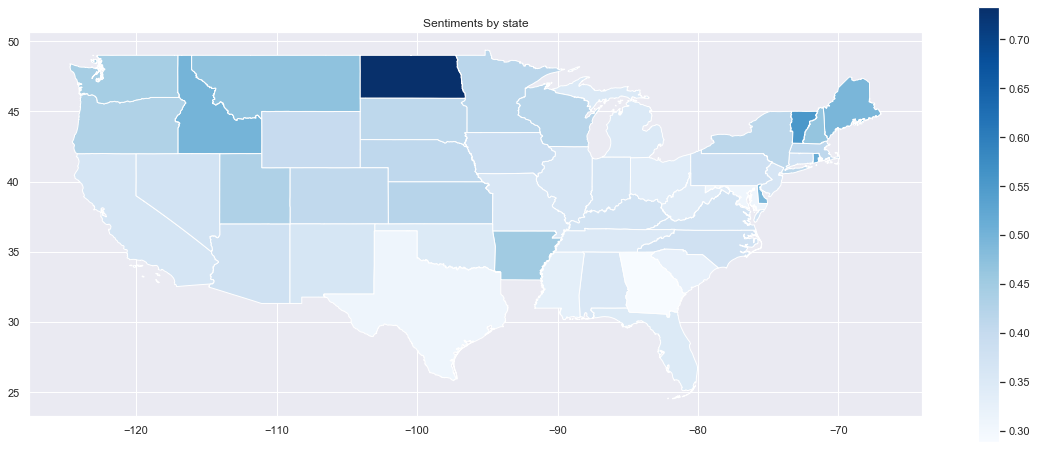

In [174]:
colors = 9
cmap = 'Blues'
ax = merged[merged['NAME'].isin(['Alaska','Hawaii', 'Puerto Rico']) == False].dropna().plot(column='sentiment_probs', 
                                                cmap=cmap, figsize=(20, 8), k=colors, legend=True)
plt.title('Sentiments by state')
plt.savefig('images/sentiments_by_state.png')

In [148]:
data[data['state'] == 'Vermont'].count()

Unnamed: 0                    124
Unnamed: 0.1                  124
coordinates                     0
created_at                    124
hashtags                       18
media                           0
urls                            0
favorite_count                124
id                            124
in_reply_to_screen_name         8
in_reply_to_status_id           8
in_reply_to_user_id             8
lang                          124
place                           7
possibly_sensitive              0
retweet_count                 124
reweet_id                       0
retweet_screen_name             0
source                        124
text                          124
tweet_url                     124
user_created_at               124
user_screen_name              124
user_default_profile_image    124
user_description              115
user_favourites_count         124
user_followers_count          124
user_friends_count            124
user_listed_count             124
user_location 

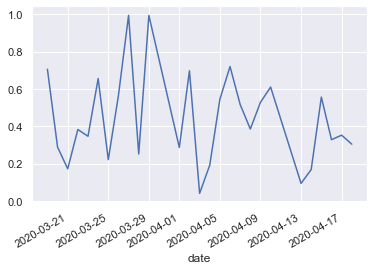

In [185]:
ny_data = data[data['state'] == 'Wyoming'].groupby('date')['sentiment_probs'].mean()
ny_data.plot()

In [193]:
data[data['user_screen_name'].str.lower() == 'realdonaldtrump']

,Unnamed: 0,Unnamed: 0.1,coordinates,created_at,hashtags,media,urls,favorite_count,id,in_reply_to_screen_name,...,user_screen_name.1,user_statuses_count,user_time_zone,user_urls,user_verified,Sentiment,tokens,sentiment_probs,date,state
